### LOGISTIC REGRESSION

#### 1. Data Exploration:
##### a. Load the dataset and perform exploratory data analysis (EDA).
##### b. Examine the features, their types, and summary statistics.
##### c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [9]:
# Load the given dataset 
train=pd.read_csv("Titanic_train.csv")
test=pd.read_csv("Titanic_test.csv")
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [10]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* We have a total of 12 columns(features).
* We have aroud 5 columns in int64 format.
* We have only 2 columns in float64 format.
* We have have 5 columns in object format.

* So we can see our training data contains 891 rows and 12 columns , and testing data contains 418 rows and 11 columns.
* We can see that our test data is missing target variable so we'll be just predicting the values after building the model.

In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Statistical Summary of the numeric columns

* Survived column has mean value of 0.4 indicating a bit of class difference, it has only 2 values 0 (not survived) and 1 (survived)
* Pclass with lesser stanrd deviation than mean indicates the data distribution might be left skewed.
* Mean age of 29, min of 0.42 says and max of 80 indicates there are people of every age group from infants to senior people.
* SibSp and Parch has greater standard deviation compared to mean indicating the data might be right skewed and maximum value of 5 could possible be an outlier
* Fare price of min 0 and max 512 might be an oulier as well.

In [18]:
# Sepearting the numerical and categorical columns are further analysis and visulaization.
num_col=[i for i in train.columns if train[i].dtype!='O']
obj_col=[i for i in train.columns if train[i].dtype=='O']
num_col,obj_col

(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

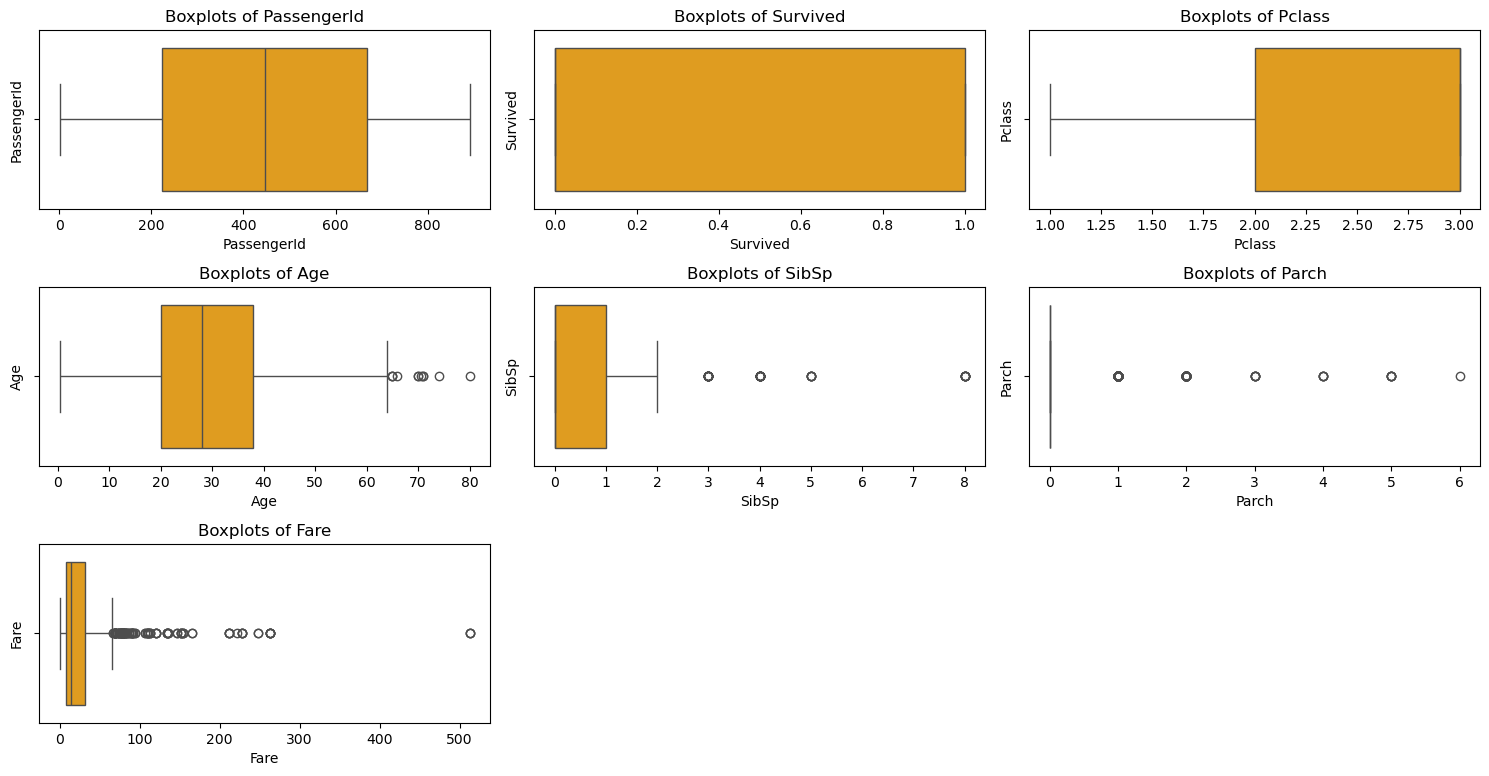

In [20]:
# Ploting the box plots to detect the outliers
plt.figure(figsize=(15,10))
index=1
for col in num_col:
    plt.subplot(4,3,index)
    sns.boxplot(x=train[col],color='orange')
    plt.title(f'Boxplots of {col}')
    index+=1
    plt.ylabel(col)
plt.tight_layout()
plt.show()

* We have quite a few numbers of outliers.
* We are assuming that these outliers will not pose a significant threat for the model so we'll retain them.

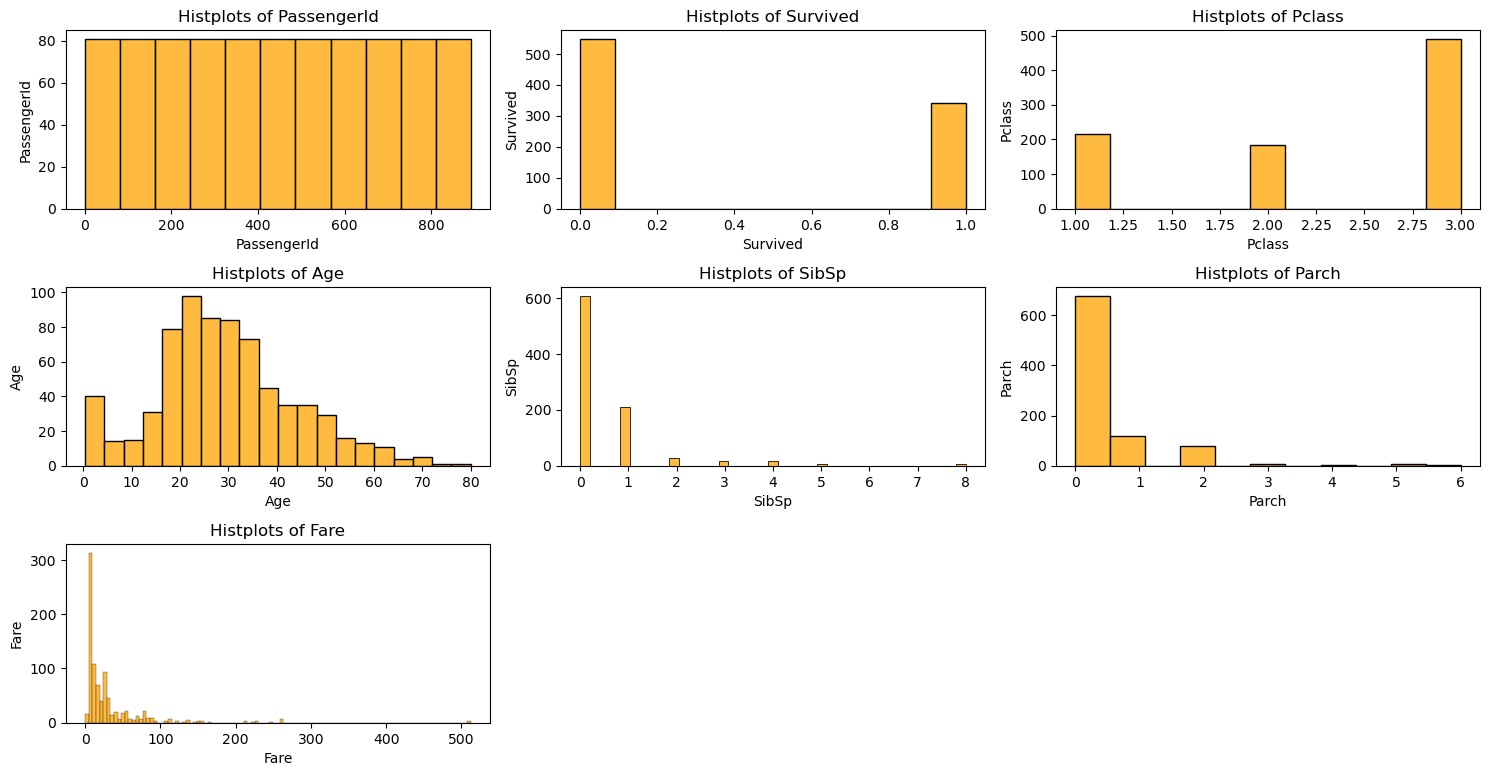

In [22]:
# Ploting the hist plots to detect the outliers
plt.figure(figsize=(15,10))
index=1
for col in num_col:
    plt.subplot(4,3,index)
    sns.histplot(x=train[col],color='orange')
    plt.title(f'Histplots of {col}')
    index+=1
    plt.ylabel(col)
plt.tight_layout()
plt.show()

We can observe that most of columns seems to be positively skewed.

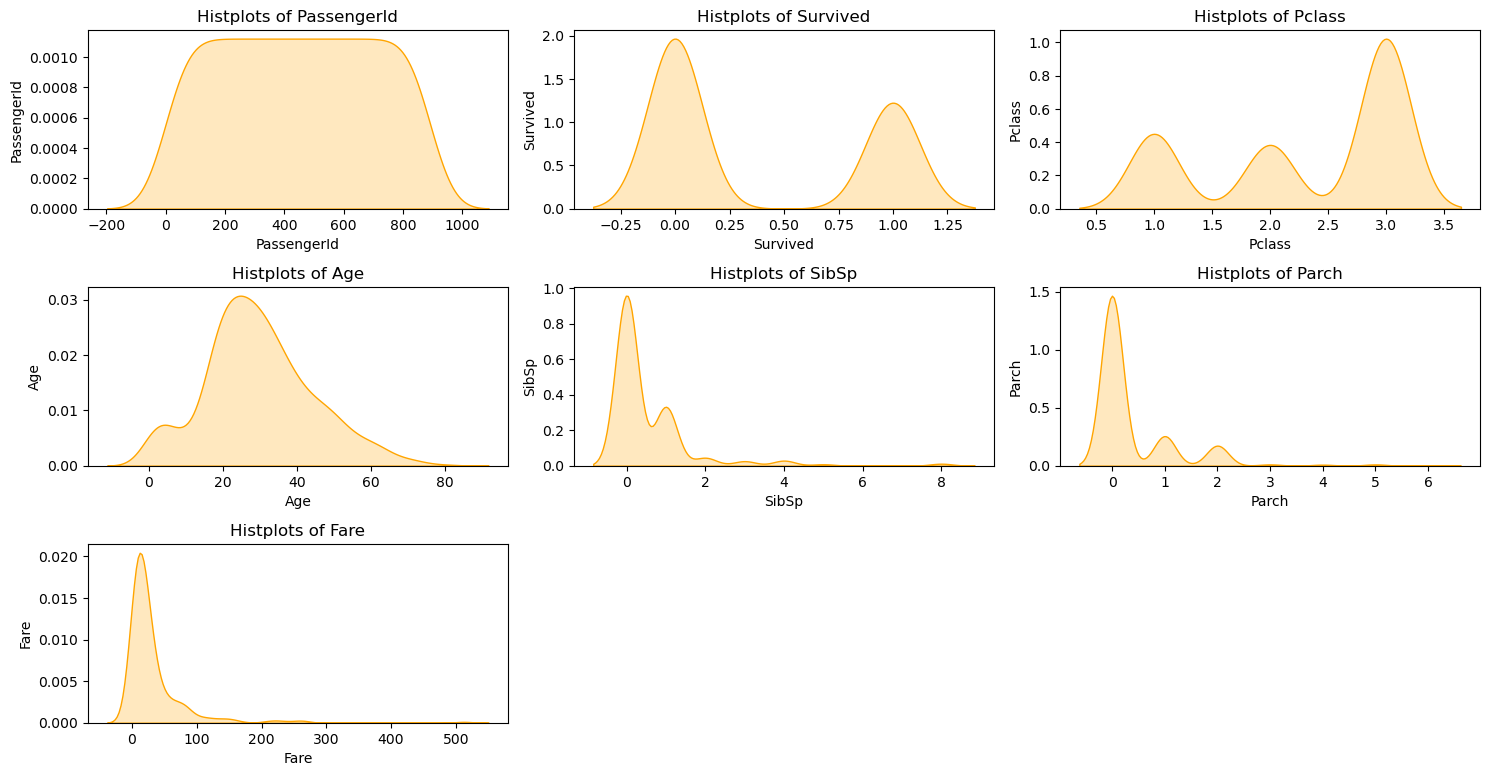

In [26]:
# Ploting the hist plots to detect the outliers
plt.figure(figsize=(15,10))
index=1
for col in num_col:
    plt.subplot(4,3,index)
    sns.kdeplot(x=train[col],color='orange', fill=True)
    plt.title(f'Histplots of {col}')
    index+=1
    plt.ylabel(col)
plt.tight_layout()
plt.show()

* We can see features like survived and Sibsp are two tailed
* Features like Pclass, Parch are one tailed
* Features like Fare, Age are one tailed

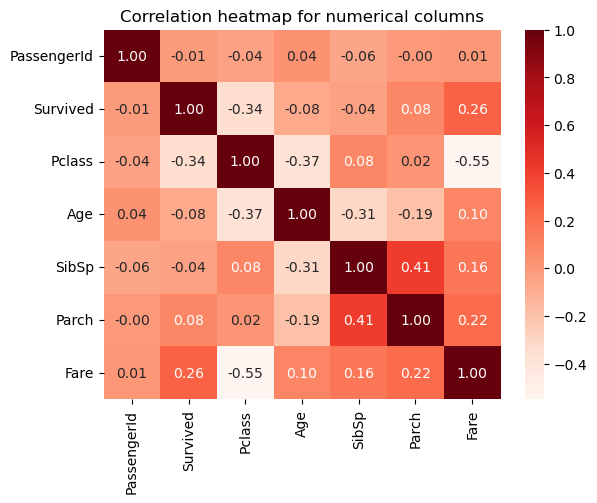

In [27]:
# let's plot correlation matrix for numerical columns
z=train.corr(numeric_only=True)
sns.heatmap((z), cmap='Reds', cbar="True", annot=True,fmt='.2f')
plt.title("Correlation heatmap for numerical columns")
plt.show()

We can see that none of the columns are highly correlated so we'll be retaining all the features.

#### 2. Data Preprocessing:
##### a. Handle missing values (e.g., imputation).
##### b. Encode categorical variables.


In [28]:
#checking for null values in each columns of train and test datasets
print(train.isnull().sum())
print()
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We can observe that

* Age column has a lot of null values but since age could be an important factor in our prediction of survivors so we'll avoid filling it with any mean value or removing the entire column, instead we'll just remove the rows.
* Cabin has a lot of null values in training and testing set so we'll be removing that column.
* Embarked has only 2 null values and since it's a categorical column we'll be filling it with mode value
* testing set fare value we'll fill with mean value.

In [29]:
#Removing Cabin column from train and test
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
train.shape, test.shape

((891, 11), (418, 10))

In [30]:
#Filling the null values of Embarked and Fare
mod_val = train['Embarked'].mode()[0]           #getting the mode value of embarked column
# The mode value of Embarked column is S.

train['Embarked'].fillna(mod_val, inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [31]:
# dropping rows with age as null vlaues
train.dropna(axis=0, inplace=True)
test.dropna(axis=0, inplace=True)

In [32]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [33]:
train.nunique()

PassengerId    714
Survived         2
Pclass           3
Name           714
Sex              2
Age             88
SibSp            6
Parch            7
Ticket         542
Fare           220
Embarked         3
dtype: int64

* We cannot convert name into interger because every name is different.
* We will be converting Sex and Embarked
* Ticket is also of object column but it has a lot of unique value so it will be meaningless to convert it into numerical.

In [34]:
#we'll be converting sex and embarked using label encoder in both train and test data
from sklearn.preprocessing import LabelEncoder

encode_cols = ['Sex','Embarked']             #denings the names of the column where we need to convert
for col in encode_cols:                      # running the loop through all the columns defined in the list
    le = LabelEncoder()                      # calling the label encoder method
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [35]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  


In [36]:
print(test.head())

   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare  Embarked  
0  34.5      0      0   330911   7.8292         1  
1  47.0      1      0   363272   7.0000         2  
2  62.0      0      0   240276   9.6875         1  
3  27.0      0      0   315154   8.6625         2  
4  22.0      1      1  3101298  12.2875         2  


#### 3. Model Building:
##### a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
##### b. Train the model using the training data.


In [37]:
# feature extraction training data
x = train.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1)    #removing columns which are not useful for the model prediction
y = train['Survived']
# x and y is our training data
x.shape, y.shape

((714, 7), (714,))

In [38]:
#extracting testing data
x_test = test.drop(columns=['PassengerId','Name','Ticket'], axis=1)
x_test.shape

(332, 7)

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model

LogisticRegression()

In [40]:
model.fit(x, y)
model

LogisticRegression()

In [41]:
#let's predict the values on testing data
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

#### 4. Model Evaluation:
##### a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
##### Visualize the ROC curve.


* Since we don't have a y_test data we won't be able to get testing accuracy.
* So we'll be performing model evaluation using training set.

In [42]:
# predicting the training data
predict = model.predict(x)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

print("Accuracy Score of our model is : ",accuracy_score(y, predict))     
print("Precision Score of our model is : ",precision_score(y, predict))
print("Recall Score of our model is : ",recall_score(y, predict))
print("F1 Score of our model is : ",f1_score(y, predict))
print("ROC-AUC Score of our model is : ",roc_auc_score(y, predict))

Accuracy Score of our model is :  0.8053221288515406
Precision Score of our model is :  0.7870722433460076
Recall Score of our model is :  0.7137931034482758
F1 Score of our model is :  0.7486437613019892
ROC-AUC Score of our model is :  0.7908588158750813


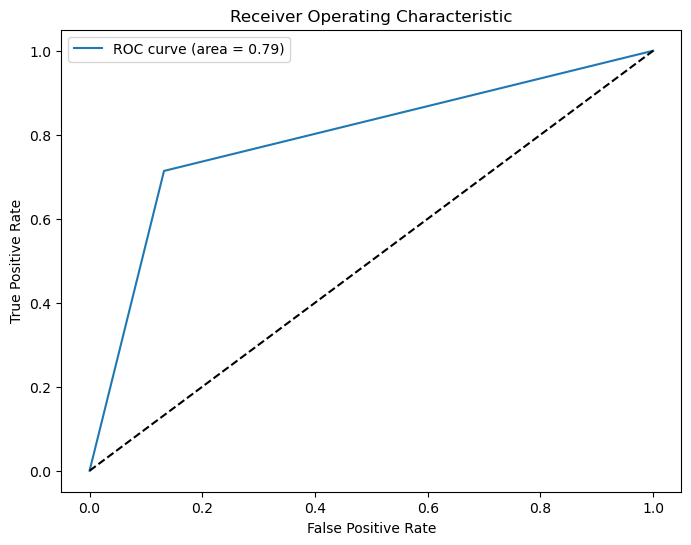

In [44]:
# Let's Visualize ROC-AUC Curve
# Compute ROC curve and AUC
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, predict)              # getting false positive rate, true positive rate and threshods
auc = roc_auc_score(y, predict)                           # getting roc-auc score to display in legend

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')                             # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

* This means that our data lies 79% inside this area and remaining is the uncertainity.

#### 5. Interpretation:
##### a. Interpret the coefficients of the logistic regression model.
##### b. Discuss the significance of features in predicting the target variable (survival probability in this case).


In [45]:
print(model.coef_)

[[-1.17526721e+00 -2.49722822e+00 -4.20300728e-02 -3.46081117e-01
  -4.93997158e-02  1.76249916e-03 -1.68922736e-01]]


* All of these values are related to each feature respectively revealing how much they are related to the positive or negative outcomes of the target outcome.
* Positive Coefficients : increases the chance of positive outcomes (survived)
* Here we have only one feature that corresponts to positive outcomes. Although the number is quite small so it has a very weak effect for the positive outcomes.
* Negative Coefficients : decreases the chance of positive outcomes.
* Here we have many features that decereses the chance of positive outcomes meaning, it helps towards negative outcome (not survived), smaller the negative number stronger is it's impact for the negative outcome of the predictions. (example: a number -2.1 has much stronger impact than -0.09)

In [46]:
print(model.intercept_)

[5.36607971]


* Intercept represents the starting point of the model's prediction, it reveals that the model predicts with high confidence when all the values of the feature is zero

#### significance of features in predicting the target variable

* The first feature (Pclass) with coefficient value -1.170950 strongly negatively corelates to the survival of the passengers meaniing it helps the model more towards finding the not survived.
* The second feature (Sex) with coefficient value -2.49606 very strongly negatively corelates to the survival of the passengers meaniing it helps the model more towards finding the not survived. We can also say this is one of the main features based on the model's prediction because it is the most significant feature (by the coef_)
* The third feature (Age) with coefficient value -0.0420558 sightly contributes towards the prediction of not survived.
* The fourth feature (SibSp) with coefficient value -0.34521 also contributes towards the prediction of not survived.
* The fifth feature (Parch) with coefficient value -0.0498029 sightly contributes towards the prediction of not survived.
* The sixth feature (Fare) with coefficient value 0.00177275 very less significance contributes towards positive prediction that is survived.
* The last feature (Embarked) with coefficient value -0.172668 sightly contributes towards the prediction of not survived.

#### 6. Deployment with Streamlit:

In [48]:
# Demo code for making a predictive system
# Pclass : 1, 2, 3
# Sex : 1-male, 0-Female
# Age : 0.42 to 80
# SibSp : 0,1,2,3,4,5
# Parch : 0-6
# Fare : min-0.0, max- 512.3292
# Embarked : 0,1,2

input_data = [2,0,40,0,1,30,0]

inp_data_array = np.array(input_data)

inp_data_reshaped = inp_data_array.reshape(1, -1)

pred_in = model.predict(inp_data_reshaped)
# print(pred_in)

if pred_in[0] == 0:
    print("The Person did not SURVIVE")
else:
    print("The Person Survived")

The Person Survived


In [49]:
#saving the model in pickel file

import pickle
file_name = "survival_model.pkl"
pickle.dump(model, open(file_name, 'wb'))

In [51]:
# code for loading the saved model

loaded_model = pickle.load(open("survival_model.pkl", "rb"))

#### Interview Questions:

##### What is the difference between precision and recall?
Answer

* PRECISION : Measures the proportion of correctly predicted positive samples out of all predicted positive sample.
* It's main goal is to minimize the FASE POSTITVES

   Formula: Precision = TP/(TP+FP)

* RECALL : Measures the proportion of correctly predicted positive samples out of all actual positive sample.
* It's main goal is to minimize the FASE NEGATIVES

  Formula: Precision = TP/(TP+FN)

* What is cross-validation, and why is it important in binary classification? Answer
* Cross-validation is a statistical method used to evaluate the performance of a model by splitting the datset into multiple subsets (also called as folds). The model is trained on some folds and validated on the remaining ones. The process is repeated and the performace is taken by averaging all the models.

The importanace of cross validation is:
* Prevents overfitting
* It enables to use the data efficiently
* Provides more reliable estimation of the model's performance compared to single train-test-split.

Some common corss-validation techniques are:
* k-Flod Cross-Validation
* Stratified k-Fold Cross-Validation